![](https://i.imgur.com/dP7i2ya.gif)
<h1><center>🍿Netflix-EDA+ConsumptionAnalysis🍿</center></h1>

# 1.Introduction
- Netflix, Inc. is an American Technology & media-services provider and production company headquartered in Los Gatos, California, founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California. 
- The company's primary business is its subscription-based streaming service which offers online streaming of a library of films and television programs, including those produced in-house. 
- As of April 2020, Netflix had over 193 million paid subscriptions worldwide, including 73 million in the United States.It is available worldwide except in the following: mainland China (due to local restrictions), Iran, Syria, North Korea, and Crimea (due to U.S. sanctions). The company also has offices in France, United States, United Kingdom, Brazil, the Netherlands, India, Japan, and South Korea.Netflix is a member of the Motion Picture Association of America (MPAA). Today, the company produces and distributes content from countries all over the globe.
- This dataset contains the meta details about the movies and tv shows.

## 2. Importing Libraries 📚

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas_profiling 
from pandas_profiling import ProfileReport 
import plotly.graph_objects as go

import networkx as nx
import math as math
import time
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = [14,14]

## 2.1 Importing Dataset📚

In [2]:
data=pd.read_csv("input/netflix_titles.csv")

## 3. Exploratory Data Analysis🔎
In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. 

## 3.1 General EDA

1. Essentials: type, unique values, missing values.
2. Quantile statistics like minimum value, Q1, median, Q3, maximum, range, interquartile range.
3. Descriptive statistics like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness.
4. Most frequent values.
5. Histogram.
6. Correlations show the correlated variables, Spearman and Pearson matrices.
7. Sample of dataset

In [3]:
ProfileReport(data)

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## Profile Profiling is much faster way to do basic general EDA

### Q1:Which are Oldest Movies available on Netflix??

In [4]:
old = data.sort_values("release_year", ascending = True)
old = old[old['duration'] != ""]
old = old[old['type'] !="TV Show"]
old[['title', "release_year","country","duration"]][:15]

title  release_year  \
2011                                    Prelude to War          1942   
2013                              The Battle of Midway          1942   
2022     Undercover: How to Operate Behind Enemy Lines          1943   
2023                Why We Fight: The Battle of Russia          1943   
2026                   WWII: Report from the Aleutians          1943   
2017  The Memphis Belle: A Story of a\nFlying Fortress          1944   
2019                                 The Negro Soldier          1944   
2021                                  Tunisian Victory          1944   
2012                                        San Pietro          1945   
2009                          Nazi Concentration Camps          1945   
2005                           Know Your Enemy - Japan          1945   
2930                                      The Stranger          1946   
2006                                Let There Be Light          1946   
2020                                       Thunderbolt          1947   
2981                                   White Christmas          1954   

                            country duration  
2011                  United States   52 min  
2013                  United States   18 min  
2022                  United States   61 min  
2023                  United States   82 min  
2026                  United States   45 min  
2017                  United States   40 min  
2019                  United States   40 min  
2021  United States, United Kingdom   76 min  
2012                  United States   32 min  
2009                  United States   59 min  
2005                  United States   63 min  
2930                  United States   94 min  
2006                  United States   58 min  
2020                  United States   42 min  
2981                  United States  120 min

### Q2: What are the oldest TV shows available on Netflix??

In [5]:
old = data.sort_values("release_year", ascending = True)
old = old[old['duration'] != ""]
old = old[old['type'] !="Movie"]
old[['title', "release_year","country","duration"]][:15]

title  release_year  \
4292    Pioneers: First Women Filmmakers*          1925   
4079  Pioneers of African-American Cinema          1946   
5981  The Twilight Zone (Original Series)          1963   
5980               The Andy Griffith Show          1967   
5704                            Star Trek          1968   
614      Monty Python's Fliegender Zirkus          1972   
5669         Monty Python's Flying Circus          1974   
5830                           Dad's Army          1977   
4273                             El Chavo          1979   
4369                        Ninja Hattori          1981   
982                              Robotech          1985   
6016                          Saint Seiya          1986   
3473                           Shaka Zulu          1986   
5774                    Highway to Heaven          1988   
369                             High Risk          1988   

                                                country    duration  
4292                                                NaN    1 Season  
4079                                      United States    1 Season  
5981                                      United States   4 Seasons  
5980                                      United States   8 Seasons  
5704                                      United States   3 Seasons  
614                        United Kingdom, West Germany    1 Season  
5669                                     United Kingdom   4 Seasons  
5830                                     United Kingdom  10 Seasons  
4273                                             Mexico    1 Season  
4369                                              Japan    1 Season  
982                                United States, Japan    1 Season  
6016                                              Japan   3 Seasons  
3473  Italy, South Africa, West Germany, Australia, ...    1 Season  
5774                                      United States   5 Seasons  
369                                       United States    1 Season

### Q3:Percentage of TV shows to movie??

In [6]:
data.type.value_counts(normalize=True)

Movie      0.684151
TV Show    0.315849
Name: type, dtype: float64

In [7]:
colors = ['gold', 'mediumturquoise']
types = ['Movie','TV Show']
percentage = [0.6841,0.3158]

# Use `hole` to create a donut-like pie chart
fig = go.Figure(data=[go.Pie(labels=types, values=percentage, hole=.6)])
fig.update_traces(hoverinfo='label', textinfo='label', textfont_size=10,
                  marker=dict(colors=colors, line=dict(color='#000000', width=1)))
fig.update_layout(
    autosize=False,
    width=500,
    height=500,
    margin=dict(
        l=50,
        r=50,
        b=0,
        t=0,
        pad=0
    ),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

### Q4:What are country wise representation of all content??

In [8]:
data['country'].value_counts()

United States                     2032
India                              777
United Kingdom                     348
Japan                              176
Canada                             141
                                  ... 
Austria, United States               1
Norway, Sweden                       1
United States,                       1
Ghana, United States                 1
Ireland, United States, France       1
Name: country, Length: 554, dtype: int64

In [9]:
country  = data['country'].value_counts()
country = country[:15,]
fig = px.bar(x=country.index, y=country.values, color=country.values,
             hover_data=[country.index, country.values],labels={'country':'Frequency'}, height=400)
fig.show()

### Q5: What are most popular titles??

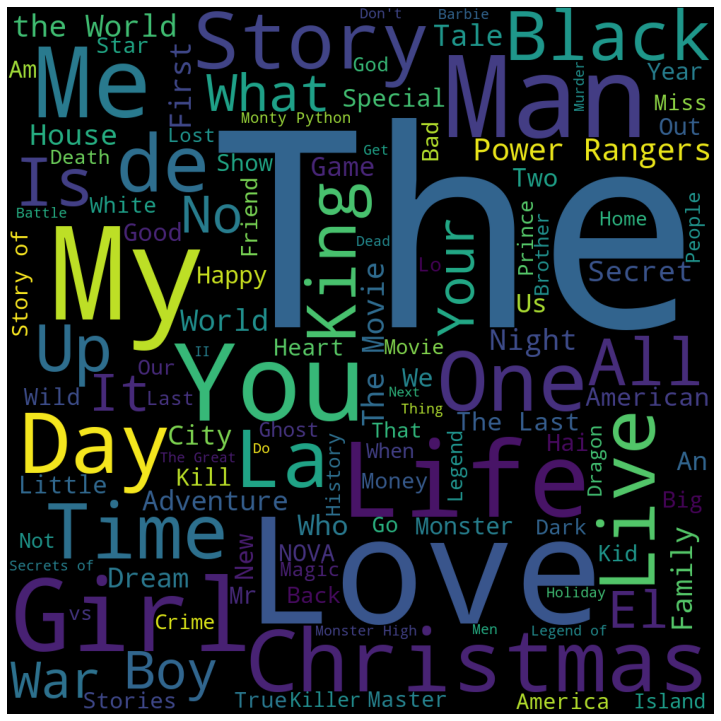

In [10]:
#Most Popular Titles
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'black', width = 1000,  height = 1000, max_words = 121).generate(' '.join(data['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Q6:What is the distribution of movies duration??

### Q7:How much content is produced today in comparison to earlier decades??

In [11]:
release_year  = data['release_year'].value_counts()
fig = px.bar(x=release_year.index, y=release_year.values, color=release_year.values,
             hover_data=[release_year.index, release_year.values],labels={'country':'Frequency'}, height=400)
# Change
fig.update_layout(barmode='stack')
fig.show()

In [12]:
df1 = data[data["type"] == "TV Show"]
df2 = data[data["type"] == "Movie"]
temp_df1 = df1['release_year'].value_counts().reset_index()
temp_df2 = df2['release_year'].value_counts().reset_index()
trace1 = go.Bar(x = temp_df1['index'],y = temp_df1['release_year'],
                name="TV Shows",marker = dict(color = 'rgb(249, 6, 6)'))
trace2 = go.Bar(x = temp_df2['index'],y = temp_df2['release_year'],
                name = "Movies",
                marker = dict(color = 'rgb(26, 118, 255)'))
layout = go.Layout(template= "plotly" , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Count'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.update_layout(barmode='stack')
fig.show()

## Recomendation Engine.This is Yann's work (NOT MINE).Let's give it go..

### Building a recomendation engine based on graph using adamic bar measure
The more the measure is high, the closest are the two nodes.
The measures between all movies are NOT pre-calculated, in order to determine the list of recommendation films, we are going to explore the neighborhood of the target film

In [13]:
df=data
# convert to datetime
data["date_added"] = pd.to_datetime(data['date_added'])
data['year'] = data['date_added'].dt.year
data['month'] = data['date_added'].dt.month
data['day'] = data['date_added'].dt.day
# convert columns "director, listed_in, cast and country" in columns that contain a real list
# the strip function is applied on the elements
# if the value is NaN, the new column contains a empty list []
df['directors'] = df['director'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df['categories'] = df['listed_in'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df['actors'] = df['cast'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])
df['countries'] = df['country'].apply(lambda l: [] if pd.isna(l) else [i.strip() for i in l.split(",")])

df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country date_added  release_year  \
0  United States, India, South Korea, China 2019-09-09          2019   
1                            United Kingdom 2016-09-09          2016   
2                             United States 2018-09-08          2013   
3                             United States 2018-09-08          2016   
4                             United States 2017-09-08          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description    year  month  day  \
0  Before planning an awesome wedding for his gra...  2019.0    9.0  9.0   
1  Jandino Asporaat riffs on the challenges of ra...  2016.0    9.0  9.0   
2  With the help of three human allies, the Autob...  2018.0    9.0  8.0   
3  When a prison ship crash unleashes hundreds of...  2018.0    9.0  8.0   
4  When nerdy high schooler Dani finally attracts...  2017.0    9.0  8.0   

                    directors                            categories  \
0  [Richard Finn, Tim Maltby]  [Children & Family Movies, Comedies]   
1                          []                     [Stand-Up Comedy]   
2                          []                            [Kids' TV]   
3                          []                            [Kids' TV]   
4          [Fernando Lebrija]                            [Comedies]   

                                              actors  \
0  [Alan Marriott, Andrew Toth, Brian Dobson, Col...   
1                                 [Jandino Asporaat]   
2  [Peter Cullen, Sumalee Montano, Frank Welker, ...   
3  [Will Friedle, Darren Criss, Constance Zimmer,...   
4  [Nesta Cooper, Kate Walsh, John Michael Higgin...   

                                    countries  
0  [United States, India, South Korea, China]  
1                            [United Kingdom]  
2                             [United States]  
3                             [United States]  
4                             [United States]

In [14]:
#KMeans clustering with TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.cluster import MiniBatchKMeans

# Build the tfidf matrix with the descriptions
start_time = time.time()
text_content = df['description']
vector = TfidfVectorizer(max_df=0.4,         # drop words that occur in more than X percent of documents
                             min_df=1,      # only use words that appear at least X times
                             stop_words='english', # remove stop words
                             lowercase=True, # Convert everything to lower case 
                             use_idf=True,   # Use idf
                             norm=u'l2',     # Normalization
                             smooth_idf=True # Prevents divide-by-zero errors
                            )
tfidf = vector.fit_transform(text_content)

# Clustering  Kmeans
k = 200
kmeans = MiniBatchKMeans(n_clusters = k)
kmeans.fit(tfidf)
centers = kmeans.cluster_centers_.argsort()[:,::-1]
terms = vector.get_feature_names()

# print the centers of the clusters
# for i in range(0,k):
#     word_list=[]
#     print("cluster%d:"% i)
#     for j in centers[i,:10]:
#         word_list.append(terms[j])
#     print(word_list) 
    
request_transform = vector.transform(df['description'])
# new column cluster based on the description
df['cluster'] = kmeans.predict(request_transform) 

df['cluster'].value_counts().head()

32     5962
17        5
31        5
190       4
42        4
Name: cluster, dtype: int64

In [15]:
#«column cluster are not going to be used because clusters are two unbalanced
#But tfidf will be used in order to find similar description»
# Find similar : get the top_n movies with description similar to the target description 
def find_similar(tfidf_matrix, index, top_n = 5):
    cosine_similarities = linear_kernel(tfidf_matrix[index:index+1], tfidf_matrix).flatten()
    related_docs_indices = [i for i in cosine_similarities.argsort()[::-1] if i != index]
    return [index for index in related_docs_indices][0:top_n]  

In [16]:
G = nx.Graph(label="MOVIE")
start_time = time.time()
for i, rowi in df.iterrows():
    if (i%1000==0):
        print(" iter {} -- {} seconds --".format(i,time.time() - start_time))
    G.add_node(rowi['title'],key=rowi['show_id'],label="MOVIE",mtype=rowi['type'],rating=rowi['rating'])
#    G.add_node(rowi['cluster'],label="CLUSTER")
#    G.add_edge(rowi['title'], rowi['cluster'], label="DESCRIPTION")
    for element in rowi['actors']:
        G.add_node(element,label="PERSON")
        G.add_edge(rowi['title'], element, label="ACTED_IN")
    for element in rowi['categories']:
        G.add_node(element,label="CAT")
        G.add_edge(rowi['title'], element, label="CAT_IN")
    for element in rowi['directors']:
        G.add_node(element,label="PERSON")
        G.add_edge(rowi['title'], element, label="DIRECTED")
    for element in rowi['countries']:
        G.add_node(element,label="COU")
        G.add_edge(rowi['title'], element, label="COU_IN")
    
    indices = find_similar(tfidf, i, top_n = 5)
    snode="Sim("+rowi['title'][:15].strip()+")"        
    G.add_node(snode,label="SIMILAR")
    G.add_edge(rowi['title'], snode, label="SIMILARITY")
    for element in indices:
        G.add_edge(snode, df['title'].loc[element], label="SIMILARITY")
print(" finish -- {} seconds --".format(time.time() - start_time)) 

 iter 0 -- 0.03918766975402832 seconds --
 iter 1000 -- 7.926411867141724 seconds --
 iter 2000 -- 15.979496479034424 seconds --
 iter 3000 -- 23.952832221984863 seconds --
 iter 4000 -- 32.040202140808105 seconds --
 iter 5000 -- 39.94383120536804 seconds --
 iter 6000 -- 47.874974727630615 seconds --
 finish -- 49.72731614112854 seconds --


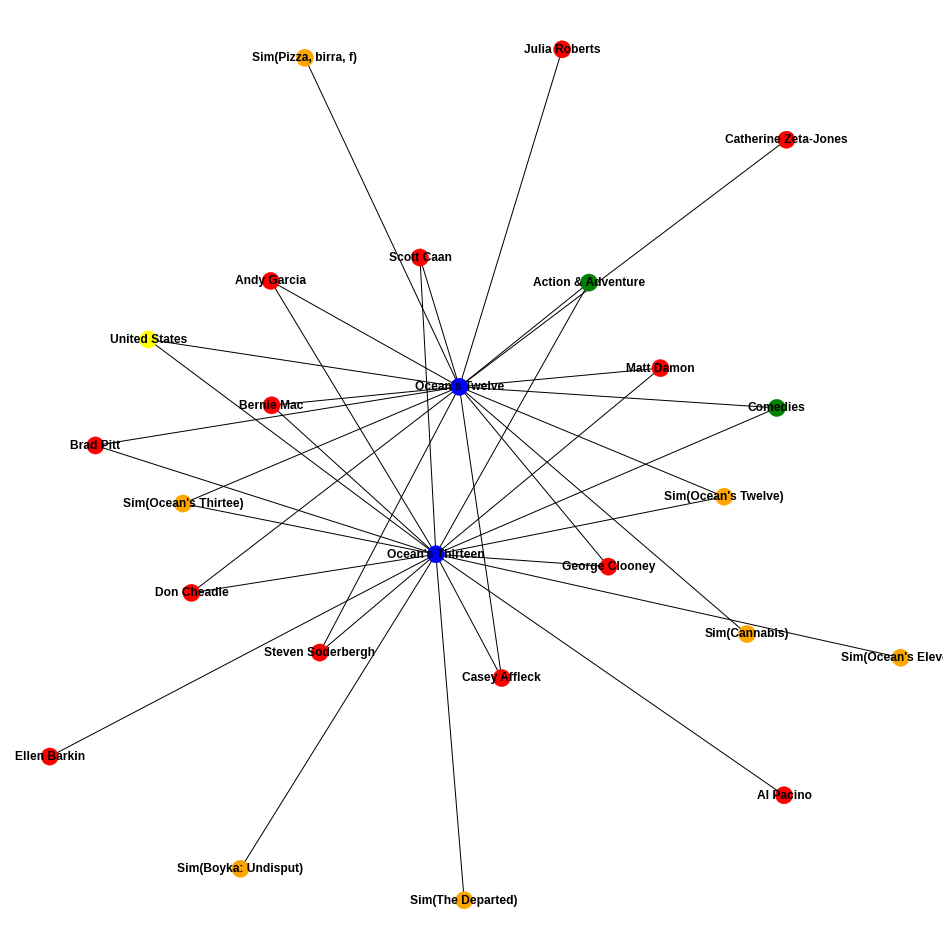

In [17]:
def get_all_adj_nodes(list_in):
    sub_graph=set()
    for m in list_in:
        sub_graph.add(m)
        for e in G.neighbors(m):        
                sub_graph.add(e)
    return list(sub_graph)
def draw_sub_graph(sub_graph):
    subgraph = G.subgraph(sub_graph)
    colors=[]
    for e in subgraph.nodes():
        if G.nodes[e]['label']=="MOVIE":
            colors.append('blue')
        elif G.nodes[e]['label']=="PERSON":
            colors.append('red')
        elif G.nodes[e]['label']=="CAT":
            colors.append('green')
        elif G.nodes[e]['label']=="COU":
            colors.append('yellow')
        elif G.nodes[e]['label']=="SIMILAR":
            colors.append('orange')    
        elif G.nodes[e]['label']=="CLUSTER":
            colors.append('orange')

    nx.draw(subgraph, with_labels=True, font_weight='bold',node_color=colors)
    plt.show()
list_in=["Ocean's Twelve","Ocean's Thirteen"]
sub_graph = get_all_adj_nodes(list_in)
draw_sub_graph(sub_graph)

In [18]:
#The recommendation function
#Explore the neighborhood of the target film → this is a list of actor, director, country, categorie
#Explore the neighborhood of each neighbor → discover the movies that share a node with the target field
#Calcul Adamic Adar measure → final results
def get_recommendation(root):
    commons_dict = {}
    for e in G.neighbors(root):
        for e2 in G.neighbors(e):
            if e2==root:
                continue
            if G.nodes[e2]['label']=="MOVIE":
                commons = commons_dict.get(e2)
                if commons==None:
                    commons_dict.update({e2 : [e]})
                else:
                    commons.append(e)
                    commons_dict.update({e2 : commons})
    movies=[]
    weight=[]
    for key, values in commons_dict.items():
        w=0.0
        for e in values:
            w=w+1/math.log(G.degree(e))
        movies.append(key) 
        weight.append(w)
    
    result = pd.Series(data=np.array(weight),index=movies)
    result.sort_values(inplace=True,ascending=False)        
    return result;

In [19]:
result = get_recommendation("The Perfect Date")
result2 = get_recommendation("Ocean's Thirteen")
result3 = get_recommendation("The Devil Inside")
result4 = get_recommendation("Stranger Things")
print("*"*40+"\n Recommendation for 'Ocean's Twelve'\n"+"*"*40)
print(result.head())
print("*"*40+"\n Recommendation for 'Ocean's Thirteen'\n"+"*"*40)
print(result2.head())
print("*"*40+"\n Recommendation for 'Belmonte'\n"+"*"*40)
print(result3.head())
print("*"*40+"\n Recommendation for 'Stranger Things'\n"+"*"*40)
print(result4.head())

****************************************
 Recommendation for 'Ocean's Twelve'
****************************************
Sardaarji 2         1.816906
Daagdi Chaawl       1.674332
Trinkets            1.569881
American Heist      1.442695
The New Romantic    1.221534
dtype: float64
****************************************
 Recommendation for 'Ocean's Thirteen'
****************************************
Ocean's Twelve       7.575565
Ocean's Eleven       2.100704
The Departed         1.698527
Brooklyn's Finest    1.492545
Boyka: Undisputed    1.400020
dtype: float64
****************************************
 Recommendation for 'Belmonte'
****************************************
The Devil and Father Amorth              1.423117
Making a Murderer                        1.243407
Belief: The Possession of Janet Moses    1.116221
The Diabolical                           1.032475
The Autopsy of Jane Doe                  1.032475
dtype: float64
****************************************
 Recommendation 

## Credits:
1. https://www.kaggle.com/shivamb/netflix-shows-and-movies-exploratory-analysis
2. https://www.kaggle.com/vikassingh1996/netflix-movies-and-shows-plotly-recommender-sys
3. https://www.kaggle.com/yclaudel/recommendation-engine-with-networkx -Thanks Yann I am learning a lot from your networkx work..